# PROJECT AKHIR KECERDASAN BUATAN
#### Kelompok 7 (A1-21)
#### Nama Anggota :
#### Rezky Nur Sya'ban         (2109106009)
#### Andi Nur Fadilah          (2109106015)
#### Adlina Safa Sephia Putri  (2109106021)
# ----------------------------------------------------------------------------------------------------
# Klasifikasi Jenis Sampah
* ## Penjelasan DataSet
#### Sumber Dataset Klasifikasi Sampah berasal dari Kaggle. Dataset tersebut berisikan gambar berbagai jenis sampah, namun kami hanya mengambil 3 jenis sampah, yaitu kaca, kertas, dan plastik. Data citra tersebut kemudian dibagi menjadi 3 kelas berdasarkan kondisinya, yaitu 'glass', 'paper', dan 'plastic' ke dalam folder yang terpisah, yakni train, test, dan val dengan perbandingan 7:1:2.

* ## Penjelasan Project
#### Projek akhir ini membahas mengenai model kecerdasan buatan dalam Pemilahan sampah yang melibatkan pemisahan sampah menurut cara penanganan atau pengolahannya. Penting untuk didaur ulang karena beberapa bahan dapat didaur ulang dan yang lainnya tidak.
# ----------------------------------------------------------------------------------------------------

# Mengimport Library yang Dibutuhkan

In [11]:
import splitfolders
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data Collecting

## Data Split
##### Memisahkan dataset ke dalam beberapa folder: train, test, dan val dengan porsi 70 : 10 : 20

In [5]:
# splitfolders.ratio("Garbage classification/Garbage classification/", output = "Klasifikasi Sampah", seed = 1337, ratio = (.7, .1, .2), group_prefix = None)

## Memuat Dataset

### A. Train

In [12]:
dataset_train = image_dataset_from_directory(
    'Klasifikasi Sampah/train/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (100, 100),
    shuffle = True, 
    seed = 47,
)

Found 1102 files belonging to 3 classes.


### B. Validation

In [13]:
dataset_val = image_dataset_from_directory(
    'Klasifikasi Sampah/val/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (100, 1000),
    shuffle = True, 
    seed = 47,
)

Found 157 files belonging to 3 classes.


### C. Test

In [14]:
dataset_test = image_dataset_from_directory(
    'Klasifikasi Sampah/test/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (100, 100),
    shuffle = True, 
    seed = 47,
)

Found 318 files belonging to 3 classes.


# Data Preprocessing

## A. Augmentasi

In [15]:
train_dir = 'Klasifikasi Sampah/train/'
test_dir = 'Klasifikasi Sampah/test/'
val_dir = 'Klasifikasi Sampah/val/'

In [35]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)


In [38]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=128,
    class_mode='categorical',
    seed=0
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    batch_size=128,
    class_mode='categorical',
    seed=0
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=128,
    class_mode='categorical',
    seed=0
)

Found 1102 images belonging to 3 classes.
Found 157 images belonging to 3 classes.
Found 318 images belonging to 3 classes.


## B. Visualisasi Augmentasi

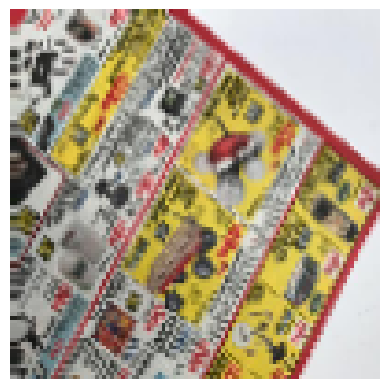

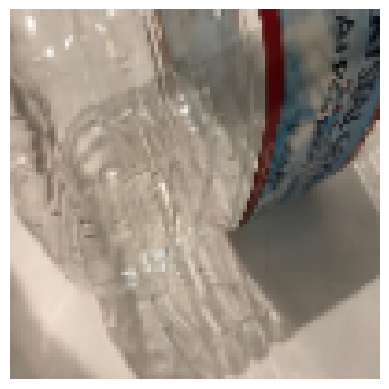

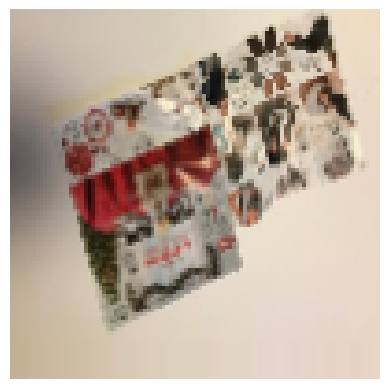

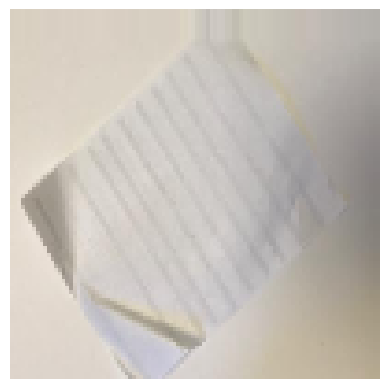

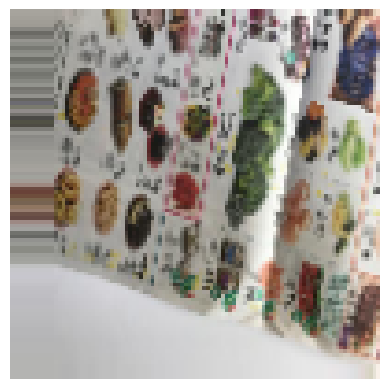

In [18]:
for _ in range(5):
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

# Data Analyst dan Visualization

## A. Meta Data

In [19]:
nama_dataset = "Garbage Classification"
sumber = "https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification"
class_names = dataset_train.class_names

In [20]:
print("-------------------------- I N F O R M A S I    D A T A S E T --------------------------")
print("Nama Dataset    : ", nama_dataset)
print("Sumber          : ", sumber)
print("Kelas           : ", dataset_train.class_names)
print("Jumlah Kelas    : ", len(dataset_train.class_names))
print("Ukuran Gambar   : ", (images.shape))
print("----------------------------------------------------------------------------------------")

-------------------------- I N F O R M A S I    D A T A S E T --------------------------
Nama Dataset    :  Garbage Classification
Sumber          :  https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
Kelas           :  ['glass', 'paper', 'plastic']
Jumlah Kelas    :  3
Ukuran Gambar   :  (32, 100, 100, 3)
----------------------------------------------------------------------------------------


## B. Visualisasi

## Pratinjau Gambar Dataset

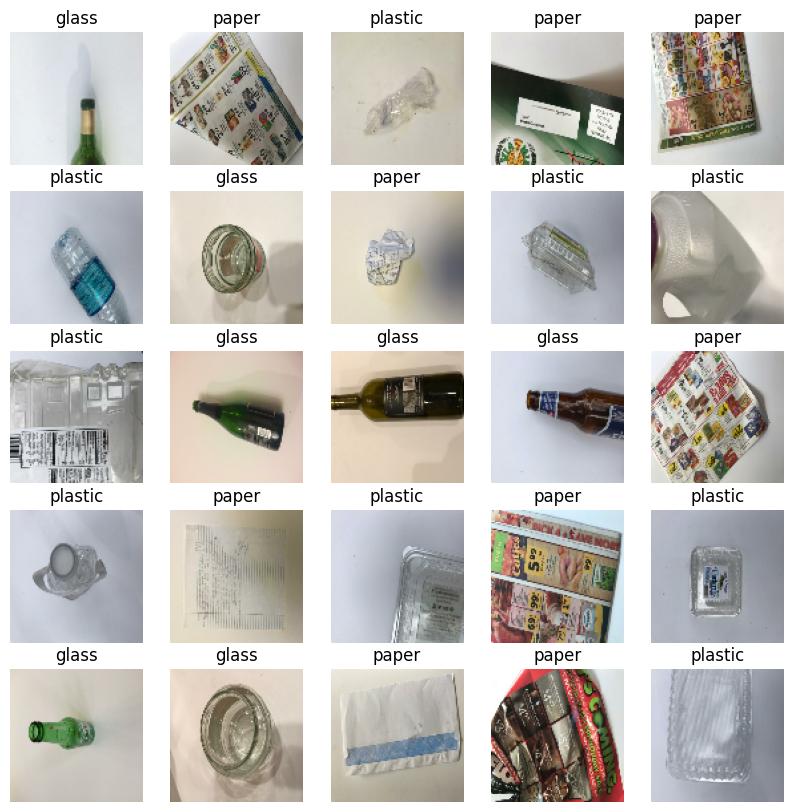

In [21]:
plt.figure(figsize = (10, 10))
for images, labels in dataset_train.take(1):
    for i in range (25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

### Data Training

In [22]:
train = dataset_train.unbatch()
labels = []
for x, y in train:
    index = y
    labels.append(class_names[index])

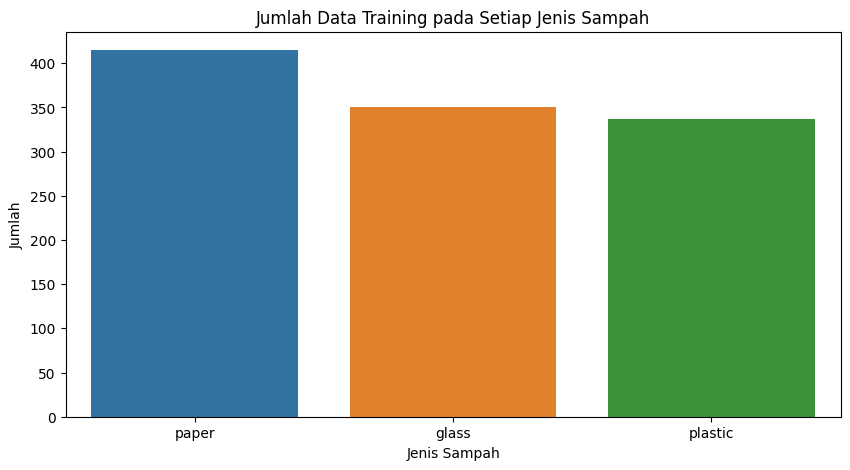

In [23]:
plt.figure(figsize = (10,5))

sns.countplot(x = labels)
plt.title("Jumlah Data Training pada Setiap Jenis Sampah")
plt.xlabel("Jenis Sampah")
plt.ylabel("Jumlah")
plt.show()

### Data Testing

In [24]:
test = dataset_test.unbatch()
labels = []
for x, y in test:
    index = y
    labels.append(class_names[index])

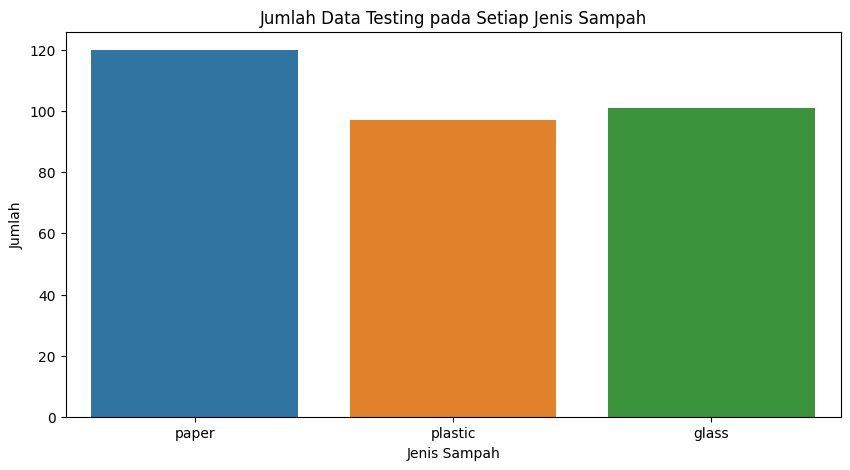

In [25]:
plt.figure(figsize = (10,5))

sns.countplot(x = labels)
plt.title("Jumlah Data Testing pada Setiap Jenis Sampah")
plt.xlabel("Jenis Sampah")
plt.ylabel("Jumlah")
plt.show()

### Data Validation

In [26]:
validation = dataset_val.unbatch()
labels = []
for x, y in validation:
    index = y
    labels.append(class_names[index])

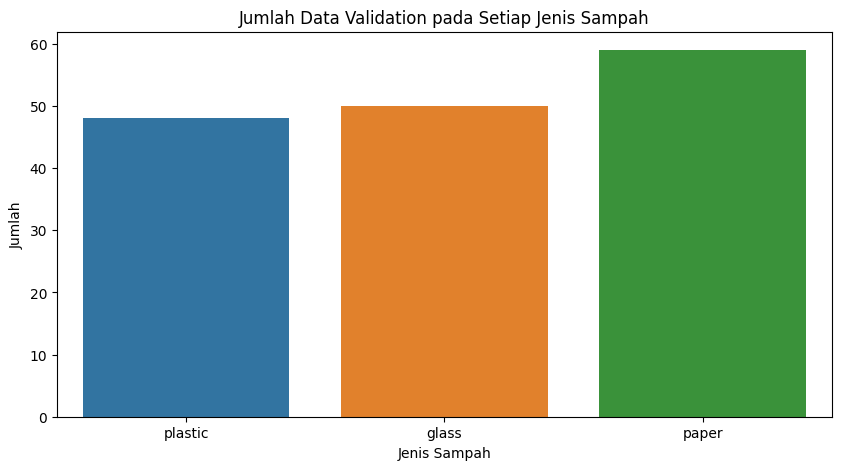

In [27]:
plt.figure(figsize = (10,5))

sns.countplot(x = labels)
plt.title("Jumlah Data Validation pada Setiap Jenis Sampah")
plt.xlabel("Jenis Sampah")
plt.ylabel("Jumlah")
plt.show()

# Modelling

In [28]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(3, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0

In [11]:
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"]
)

### Callback

In [30]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('loss') < 1e-4):
            self.model.stop_training = True
            
cb = myCallback()

### Optimasi Model

In [31]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ["accuracy"]
)

### Fitting Training Model

In [37]:
hasil = model.fit_generator(train_generator, 
                    validation_data=test_generator, 
                    epochs=60, 
                    verbose = 1,  
                    callbacks = cb)

C:\Users\ACER\AppData\Local\Temp\ipykernel_7648\2447533263.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hasil = model.fit_generator(train_generator,


Epoch 1/60
9/9 [==============================] - 18s 2s/step - loss: 0.2142 - accuracy: 0.9147 - val_loss: 0.4083 - val_accuracy: 0.8553
Epoch 2/60
9/9 [==============================] - 17s 2s/step - loss: 0.2043 - accuracy: 0.9211 - val_loss: 0.4340 - val_accuracy: 0.8270
Epoch 3/60
9/9 [==============================] - 17s 2s/step - loss: 0.1906 - accuracy: 0.9310 - val_loss: 0.5430 - val_accuracy: 0.8208
Epoch 4/60
9/9 [==============================] - 18s 2s/step - loss: 0.2145 - accuracy: 0.9065 - val_loss: 0.5035 - val_accuracy: 0.8302
Epoch 5/60
9/9 [==============================] - 17s 2s/step - loss: 0.2287 - accuracy: 0.9165 - val_loss: 0.4339 - val_accuracy: 0.8679
Epoch 6/60
9/9 [==============================] - 17s 2s/step - loss: 0.2170 - accuracy: 0.9129 - val_loss: 0.5031 - val_accuracy: 0.8333
Epoch 7/60
9/9 [==============================] - 15s 2s/step - loss: 0.2043 - accuracy: 0.9183 - val_loss: 0.4336 - val_accuracy: 0.8522
Epoch 8/60
9/9 [==================